In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [3]:
exprData = pd.read_csv("sccovid_data/expression_asympt.tsv", header=0, index_col=None, sep="\t")
exprData

,cluster,count_expr.cluster,min.cluster,lower_hinge.cluster,median.cluster,upper_hinge.cluster,max.cluster,mean.cluster,sd.cluster,count_all.cluster,gene,not_expr.cluster,expr.cluster
0,cluster.0,267,0.304062,0.582173,0.882042,1.114323,2.365796,0.893968,0.361015,3467,LINC01409,0.922988,0.077012
1,cluster.0,188,0.264904,0.614564,0.935728,1.162719,2.886743,0.954067,0.412789,3467,LINC01128,0.945774,0.054226
2,cluster.0,3,0.556145,0.739376,0.922607,1.338911,1.755215,1.077989,0.614451,3467,SAMD11,0.999135,0.000865
3,cluster.0,183,0.264123,0.596951,0.803980,1.011967,2.307550,0.874636,0.380554,3467,C1orf159,0.947217,0.052783
4,cluster.0,1760,0.304062,0.834847,1.062867,1.298896,2.682028,1.093159,0.364534,3467,AURKAIP1,0.492357,0.507643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80816,cluster.3,1,1.655461,1.655461,1.655461,1.655461,1.655461,1.655461,NaN,411,AL121787.1,0.997567,0.002433
80817,cluster.3,1,1.655461,1.655461,1.655461,1.655461,1.655461,1.655461,NaN,411,PNLDC1,0.997567,0.002433
80818,cluster.3,1,1.655461,1.655461,1.655461,1.655461,1.655461,1.655461,NaN,411,ZNF704,0.997567,0.002433
80819,cluster.3,1,1.655461,1.655461,1.655461,1.655461,1.655461,1.655461,NaN,411,AC115676.1,0.997567,0.002433


Creating Range 0.0 -> 9.0
Current Threshold 0.0
cluster.0
(24299, 5)
increase 1.8536976830322236
remaining 3 6.369666895463185 286908.90597234824
cluster.1
(45043, 6)
increase 1.7999911195968297
remaining 2 3.2399680306274483 262686.8880191816
cluster.2
(81077, 7)
increase 1.9405626749879743
remaining 1 1.9405626749879743 305318.4284692329
cluster.3
(157335, 8)
increase 1.8963294880350843
remaining 0 1.0 298359.0
Finished
Identified Threshold 0.0
Current Threshold 0.0
cluster.0
(24299, 5)
increase 1.8539446067739414
remaining 3 6.372212668999655 287061.80852576543
cluster.1
(45049, 6)
increase 1.7991520344513752
remaining 2 3.236948043070522 262354.63889086584
cluster.2
(81050, 7)
increase 1.939987661937076
remaining 1 1.939987661937076 305035.90001233807
cluster.3
(157236, 8)
increase 1.8961751761683074
remaining 0 1.0 298147.0
Finished
['bin.cluster.0', 'bin.cluster.1', 'bin.cluster.2', 'bin.cluster.3']
['mf.cluster.0', 'mf.cluster.1', 'mf.cluster.2', 'mf.cluster.3']


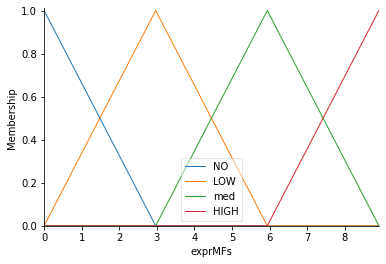

In [4]:
explDFRaw, mfFuzzy = FlowAnalysis.exprDF2LongDF(exprData)
explDF = FlowAnalysis.toFlowsDF(explDFRaw)

In [5]:
explDF

,gene,bin.cluster.0,mf.cluster.0,bin.cluster.1,mf.cluster.1,bin.cluster.2,mf.cluster.2,bin.cluster.3,mf.cluster.3,group.flow,mf.flow,id.flow
0,A1BG,NO,0.135498,NO,0.071106,NO,0.087585,NO,0.099243,"(NO, NO, NO, NO)",0.000084,202
1,A1BG,NO,0.135498,NO,0.071106,NO,0.087585,LOW,0.900879,"(NO, NO, NO, LOW)",0.000760,243
4,A1BG,NO,0.135498,NO,0.071106,LOW,0.912598,NO,0.099243,"(NO, NO, LOW, NO)",0.000873,249
5,A1BG,NO,0.135498,NO,0.071106,LOW,0.912598,LOW,0.900879,"(NO, NO, LOW, LOW)",0.007921,30
8,A1BG,NO,0.135498,LOW,0.928711,NO,0.087585,NO,0.099243,"(NO, LOW, NO, NO)",0.001094,104
...,...,...,...,...,...,...,...,...,...,...,...,...
628933,ZZEF1,LOW,0.836914,NO,0.130249,LOW,0.872070,LOW,0.833496,"(LOW, NO, LOW, LOW)",0.079234,93
628936,ZZEF1,LOW,0.836914,LOW,0.869629,NO,0.127808,NO,0.166504,"(LOW, LOW, NO, NO)",0.015488,6
628937,ZZEF1,LOW,0.836914,LOW,0.869629,NO,0.127808,LOW,0.833496,"(LOW, LOW, NO, LOW)",0.077531,239
628940,ZZEF1,LOW,0.836914,LOW,0.869629,LOW,0.872070,NO,0.166504,"(LOW, LOW, LOW, NO)",0.105680,111


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:205: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


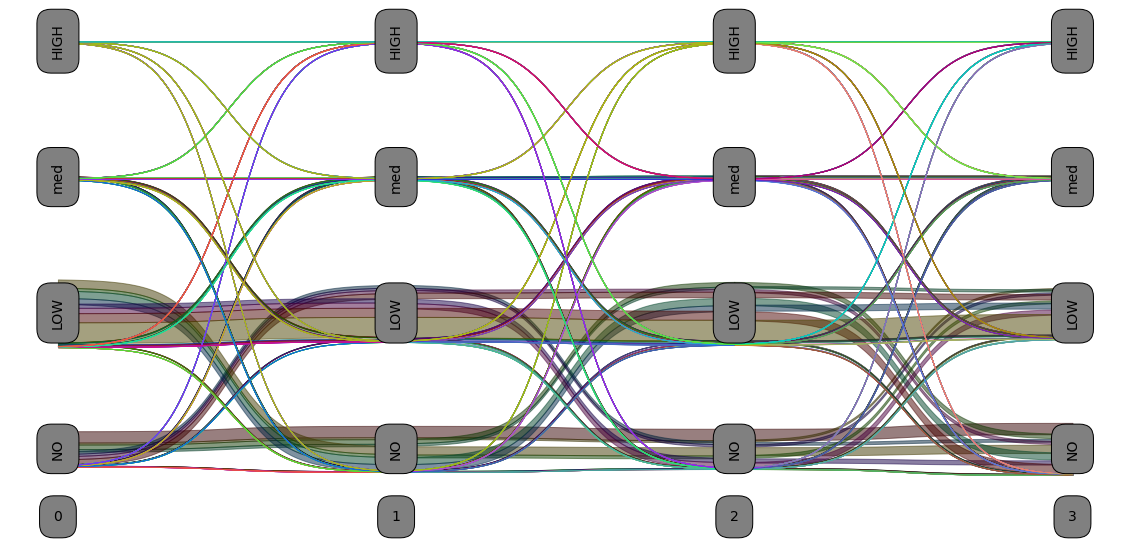

|##########################################################| 100% Time: 0:04:52


In [6]:
fa = FlowAnalysis(explDF, "gene", ( ("0", "0"), ("1", "1"), ("2", "2"), ("3", "3")), mfFuzzy) 

fa.plot_flows()
pwScores = fa.analyse_pathways()

In [7]:
pwScores[pwScores.adj_pval < 0.001].sort_values("adj_pval")

,pwid,pwname,flow_pw_score,pwsize,flow_score,flow_size,pw_gene_intersection,pw_coverage,genes_coverage,pval,chi2,mean_coverage,fgid,adj_pval
1610,R-HSA-156902,Peptide chain elongation,5.391837,94,8.577778,734,83,0.057360,0.628582,5.579105e-97,436.728004,0.036055,248,3.690600e-91
823,R-HSA-156842,Eukaryotic Translation Elongation,5.397474,99,8.577778,734,86,0.054520,0.629239,2.777668e-92,415.147428,0.034306,248,9.187192e-87
2040,R-HSA-2408557,Selenocysteine synthesis,5.302911,98,8.577778,734,81,0.054111,0.618215,2.677262e-90,406.032815,0.033452,248,4.427549e-85
825,R-HSA-72764,Eukaryotic Translation Termination,5.302911,98,8.577778,734,81,0.054111,0.618215,2.677262e-90,406.032815,0.033452,248,4.427549e-85
1503,R-HSA-975956,Nonsense Mediated Decay (NMD) independent of t...,5.309175,100,8.577778,734,82,0.053092,0.618945,1.081260e-88,398.654060,0.032861,248,1.430516e-83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,R-HSA-69620,Cell Cycle Checkpoints,166.194785,274,10980.567058,14591,248,0.606550,0.015135,4.361783e-07,25.527252,0.009180,84,8.924745e-04
1690,R-HSA-5357801,Programmed Cell Death,3.382310,212,3358.567023,24292,198,0.015954,0.001007,4.371277e-07,25.523057,0.000016,202,8.924745e-04
965,R-HSA-72706,GTP hydrolysis and joining of the 60S ribosoma...,1.120131,117,1.895589,381,82,0.009574,0.590915,4.399205e-07,25.510769,0.005657,253,8.954128e-04
1613,R-HSA-375276,Peptide ligand-binding receptors,53.478399,198,10980.567058,14591,63,0.270093,0.004870,4.438140e-07,25.493769,0.001315,84,9.005667e-04


In [8]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

In [9]:
relFlows = fa.flow_finder(["<", ">", ">="], verbose=False)

/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:205: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


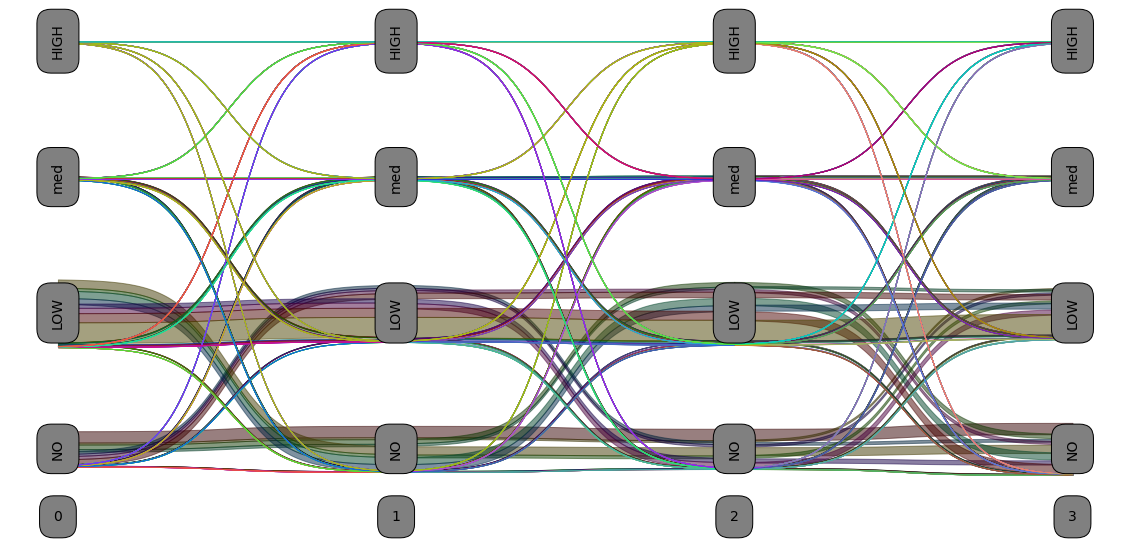

In [10]:
fa.plot_flows()

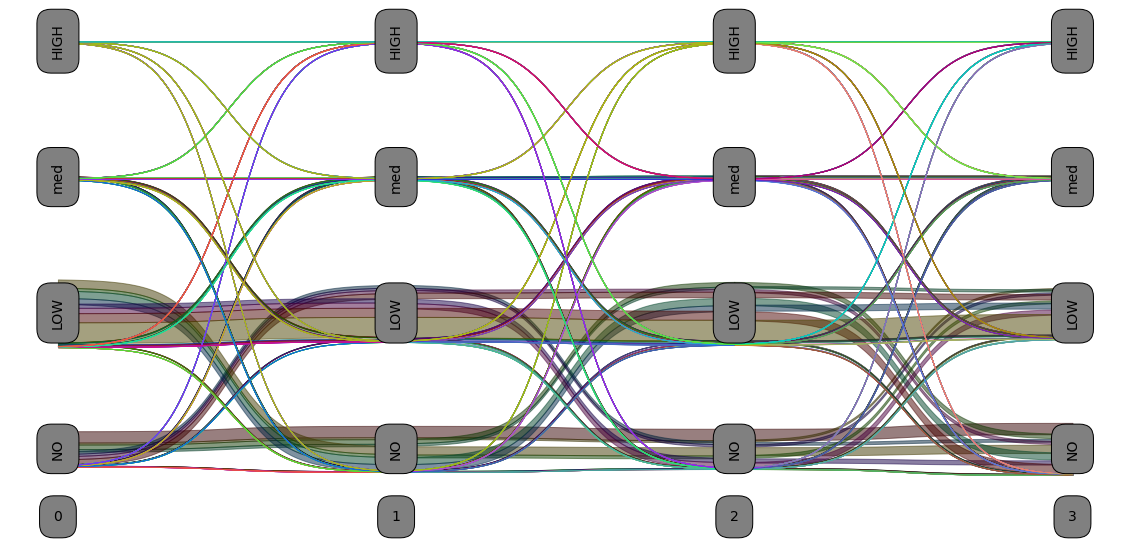

In [11]:
fa.plot_flows(use_flows=relFlows)


(479, 12)


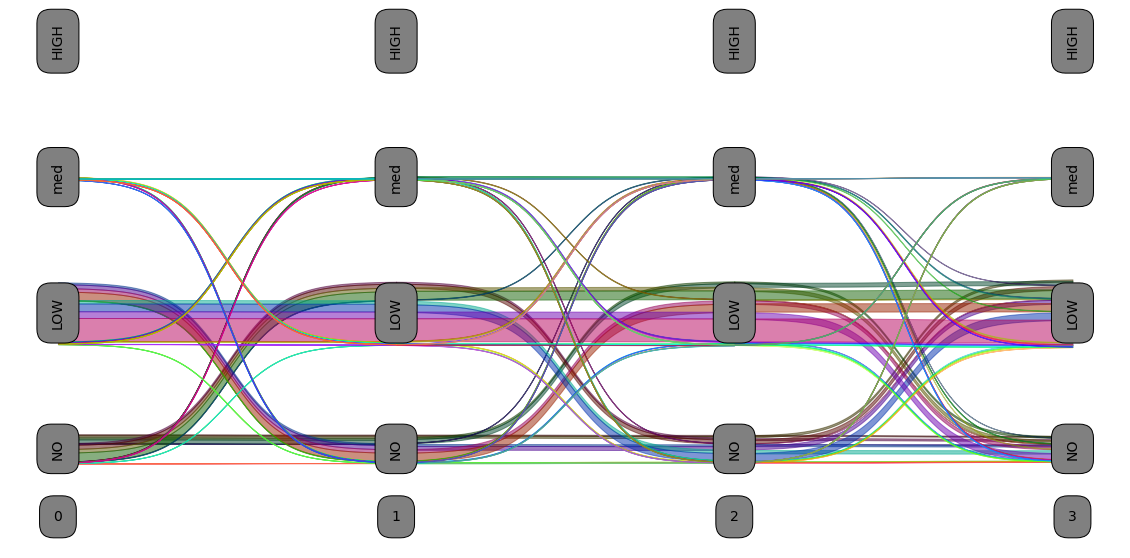

In [12]:
fa.plot_genes(genes=isgListShort)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:205: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


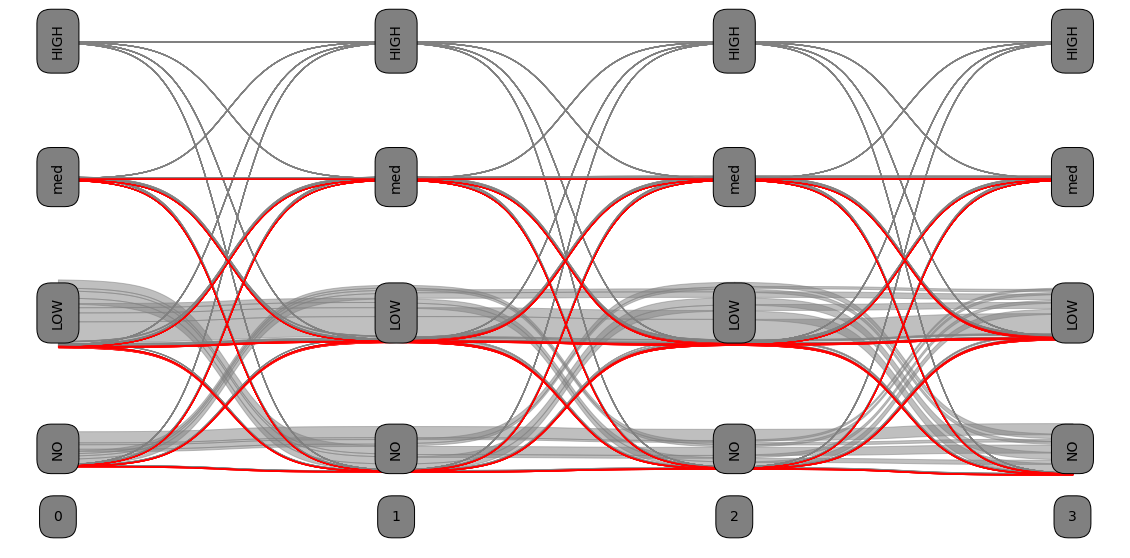

In [13]:
fa.highlight_genes(genes=isgListShort)

/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:205: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


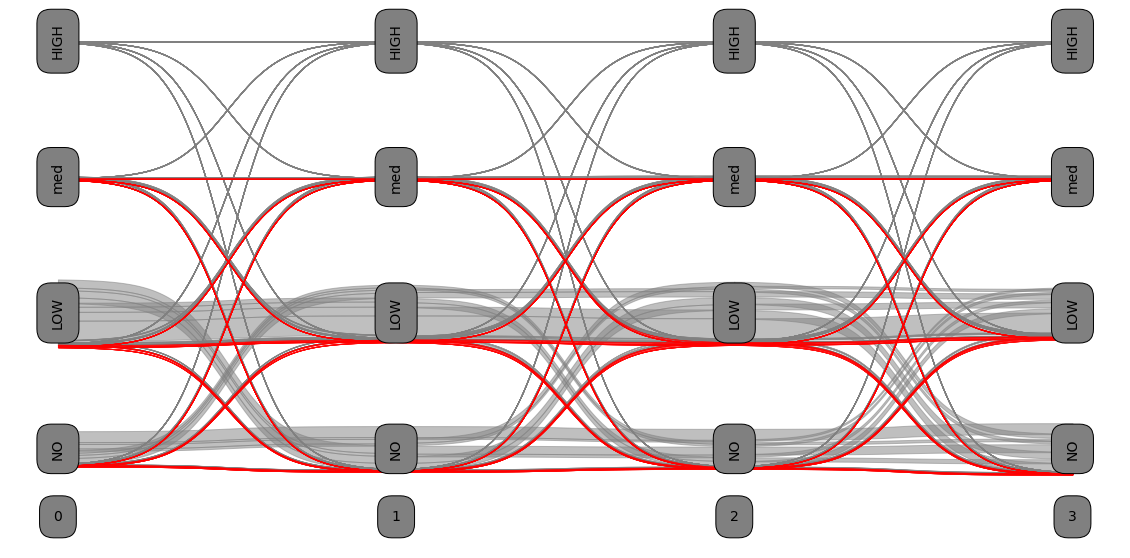

In [14]:
fa.highlight_genes(genes=isgListLong)